In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(
    style="whitegrid",
    palette="bright",  
    font_scale=1.3,
    rc={
        "axes.facecolor": "#ffffff",
        "axes.edgecolor": "#212529",
        "axes.grid": True,
        "grid.color": "#ced4da",
        "grid.linestyle": "--",
        "axes.titleweight": "bold",
        "axes.labelweight": "bold"
    }
)

In [3]:
df = pd.read_csv("penguins.csv")

In [4]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
df.isna().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 335 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   335 non-null    float64
 1   culmen_depth_mm    335 non-null    float64
 2   flipper_length_mm  335 non-null    float64
 3   body_mass_g        335 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 15.7+ KB


In [9]:
df.shape

(335, 5)

In [10]:
df.describe(include='all')

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,335.000000,335.000000,335.000000,335.000000,335
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,MALE
freq,NaN,NaN,NaN,NaN,169
mean,43.988358,17.169552,214.355224,4209.179104,NaN
std,5.453430,1.971966,263.253508,803.633495,NaN
min,32.100000,13.100000,-132.000000,2700.000000,NaN
25%,39.500000,15.600000,190.000000,3550.000000,NaN
50%,44.500000,17.300000,197.000000,4050.000000,NaN
75%,48.550000,18.700000,213.000000,4787.500000,NaN


###  -132 flipper lenght is not possible

In [11]:
#finding the row with currupt data
df[df['flipper_length_mm'] < 0]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
14,34.6,21.1,-132.0,4400.0,MALE


In [12]:
df[df['flipper_length_mm'] > 300]  # 300 is extreme for penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
9,42.0,20.2,5000.0,4250.0,MALE


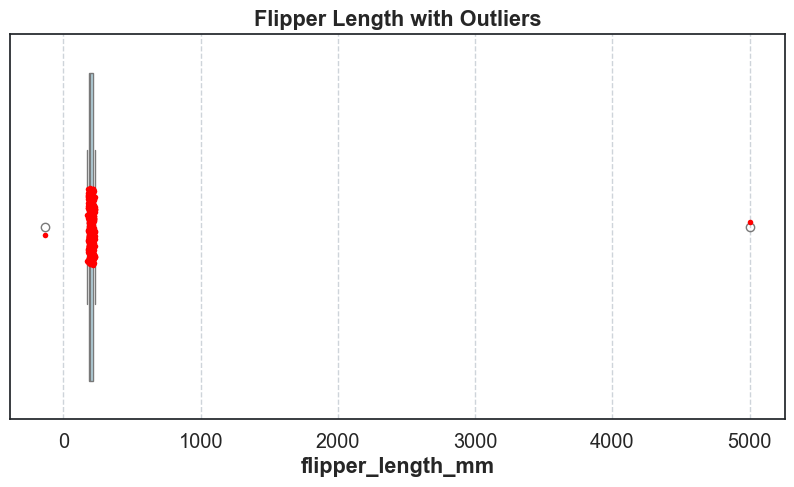

In [13]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['flipper_length_mm'], color='lightblue')
sns.stripplot(x=df['flipper_length_mm'], color='red', size=4, jitter=True)
plt.title("Flipper Length with Outliers")
plt.show()


### This is not useful for us,the data is currrpt

In [14]:
# Removing flipper lengths that are wrong
df = df[(df['flipper_length_mm'] > 50) & (df['flipper_length_mm'] < 300)]


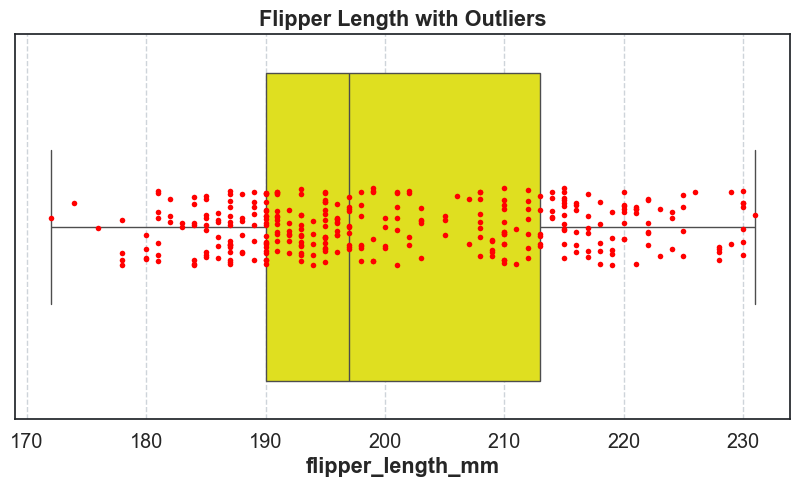

In [15]:

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['flipper_length_mm'], color='yellow')
sns.stripplot(x=df['flipper_length_mm'], color='red', size=4, jitter=True)
plt.title("Flipper Length with Outliers")
plt.show()


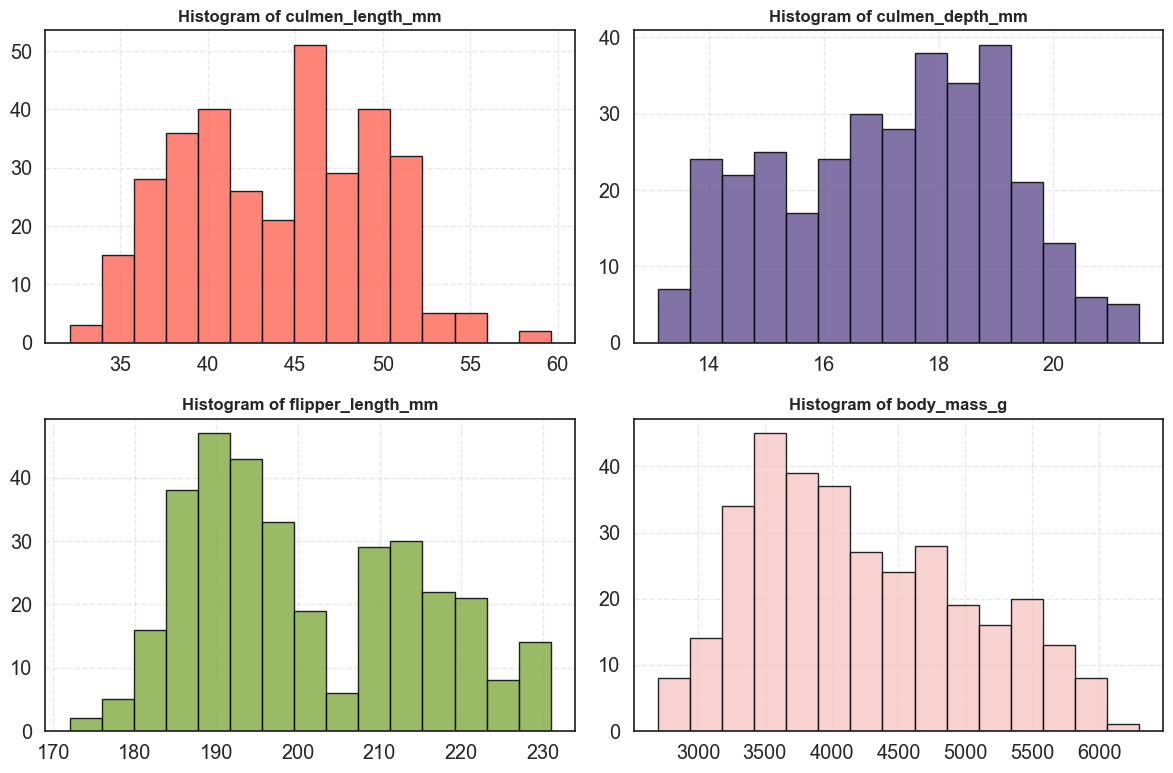

In [16]:
cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
colors = ["#ff6f61", "#6b5b95", "#88b04b", "#f7cac9"]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  

for ax, col, color in zip(axes.flatten(), cols, colors):
    ax.hist(df[col].dropna(), bins=15, color=color, alpha=0.85, edgecolor='black')
    ax.set_title(f'Histogram of {col}', fontsize=12, fontweight='bold')
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


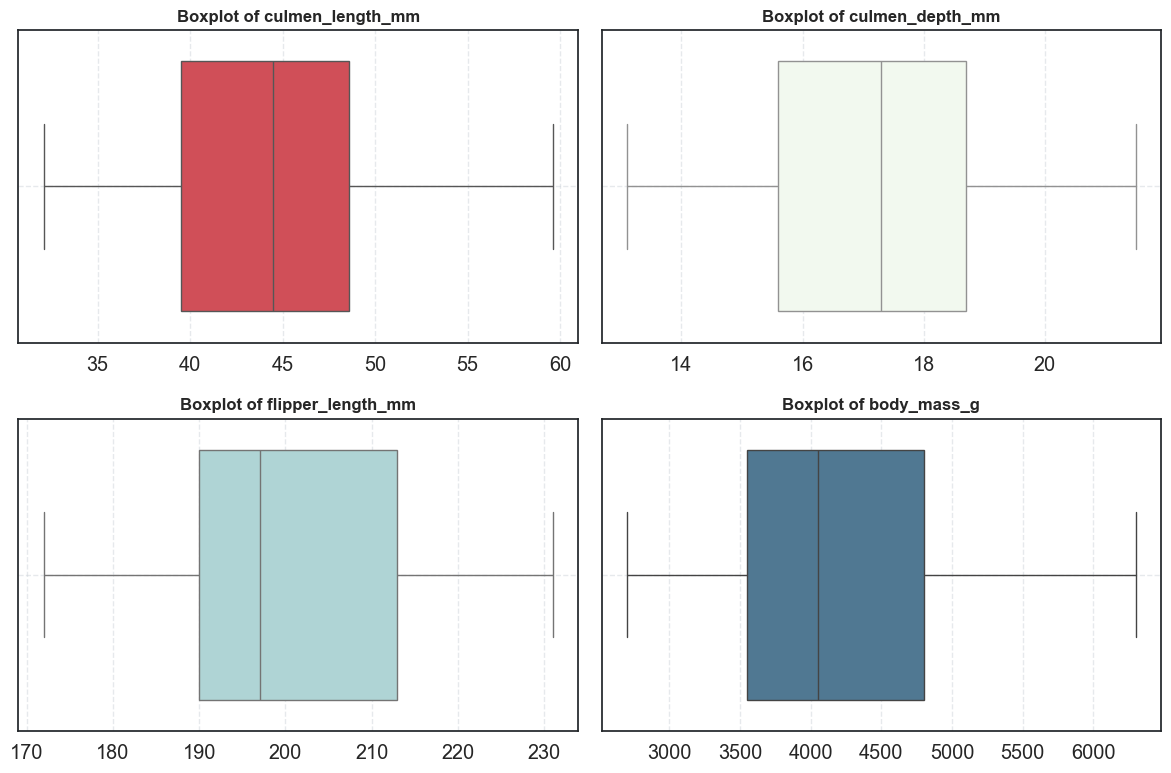

In [17]:

cols = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
colors = ["#e63946", "#f1faee", "#a8dadc", "#457b9d"]  

fig, axes = plt.subplots(2, 2, figsize=(12, 8))  

for ax, col, color in zip(axes.flatten(), cols, colors):
    sns.boxplot(x=df[col], color=color, ax=ax)
    ax.set_title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel("")  
    ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

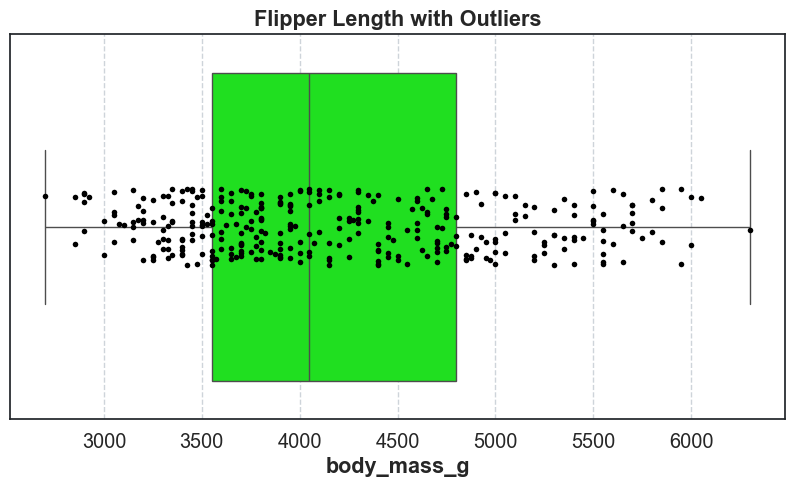

In [18]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['body_mass_g'], color='lime')
sns.stripplot(x=df['body_mass_g'], color='black', size=4, jitter=True)
plt.title("Flipper Length with Outliers")
plt.show()

sex
MALE      167
FEMALE    165
.           1
Name: count, dtype: int64


/var/folders/_p/j8371mgd60z51y816_q0nxp80000gn/T/ipykernel_73930/2299860418.py:4: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x='sex', data=df, hue='sex', palette=["#ff6f61", "#4a90e2"], legend=False)


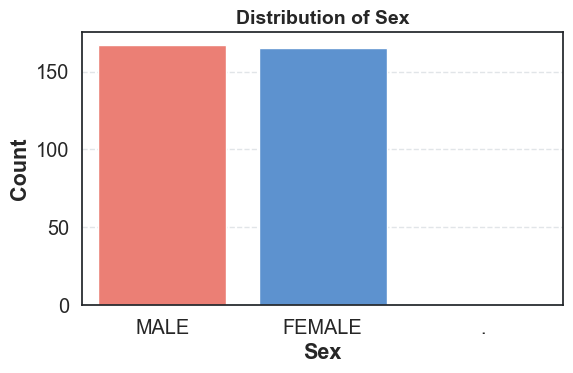

In [19]:
print(df['sex'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df, hue='sex', palette=["#ff6f61", "#4a90e2"], legend=False)
plt.title("Distribution of Sex", fontsize=14, fontweight='bold')
plt.xlabel("Sex")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [20]:
df['sex'] = df['sex'].replace('.', 'MALE')


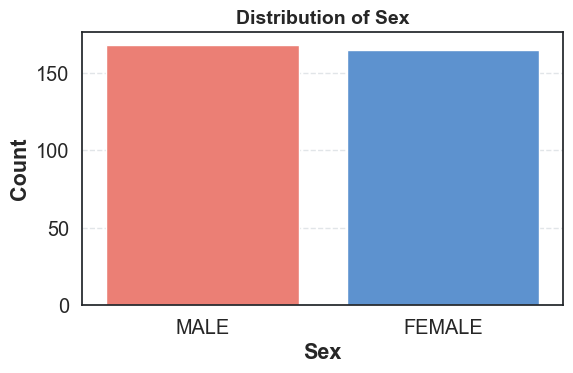

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(x='sex', data=df, hue='sex', palette=["#ff6f61", "#4a90e2"], legend=False)
plt.title("Distribution of Sex", fontsize=14, fontweight='bold')
plt.xlabel("Sex")
plt.ylabel("Count")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [22]:
print(df['sex'].value_counts(dropna=False))


sex
MALE      168
FEMALE    165
Name: count, dtype: int64


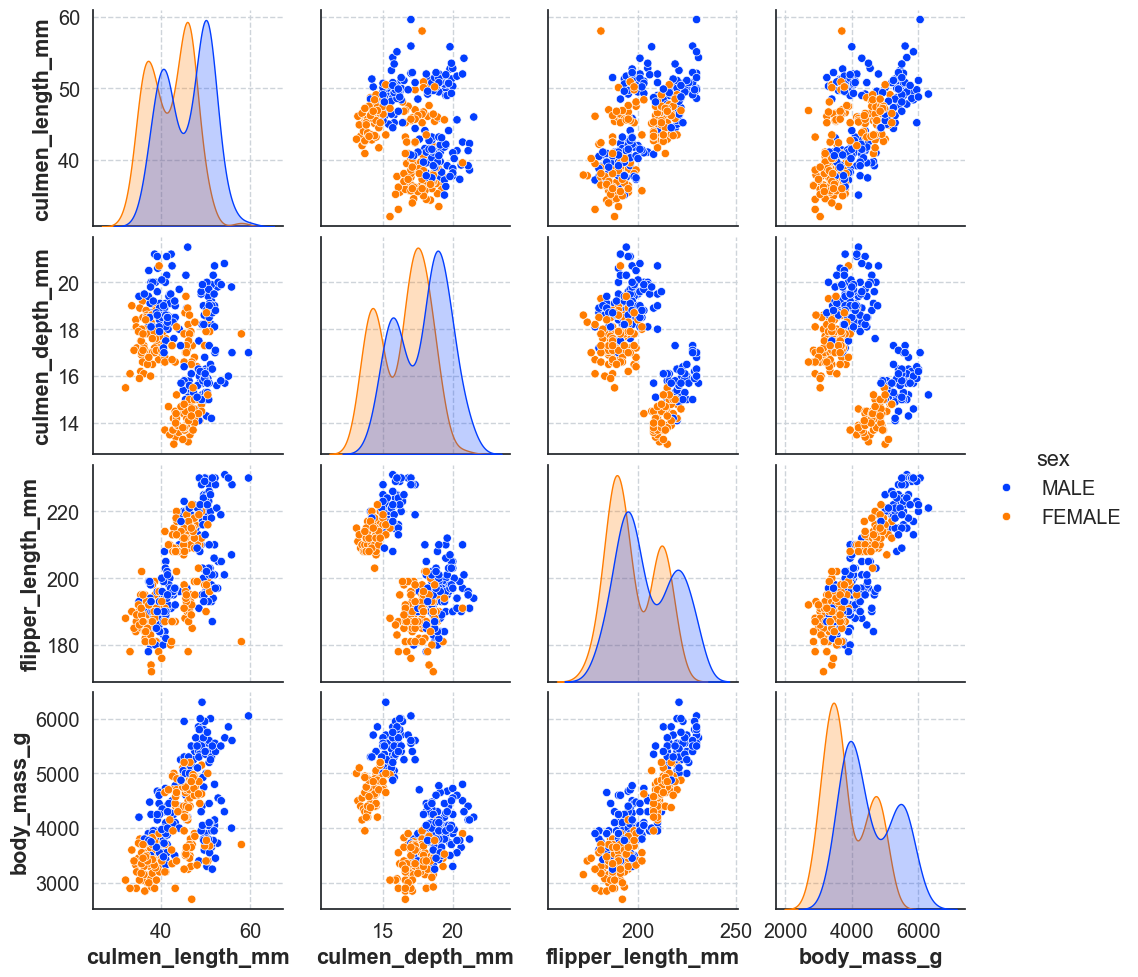

In [23]:
sns.pairplot(df, hue='sex')
plt.show()


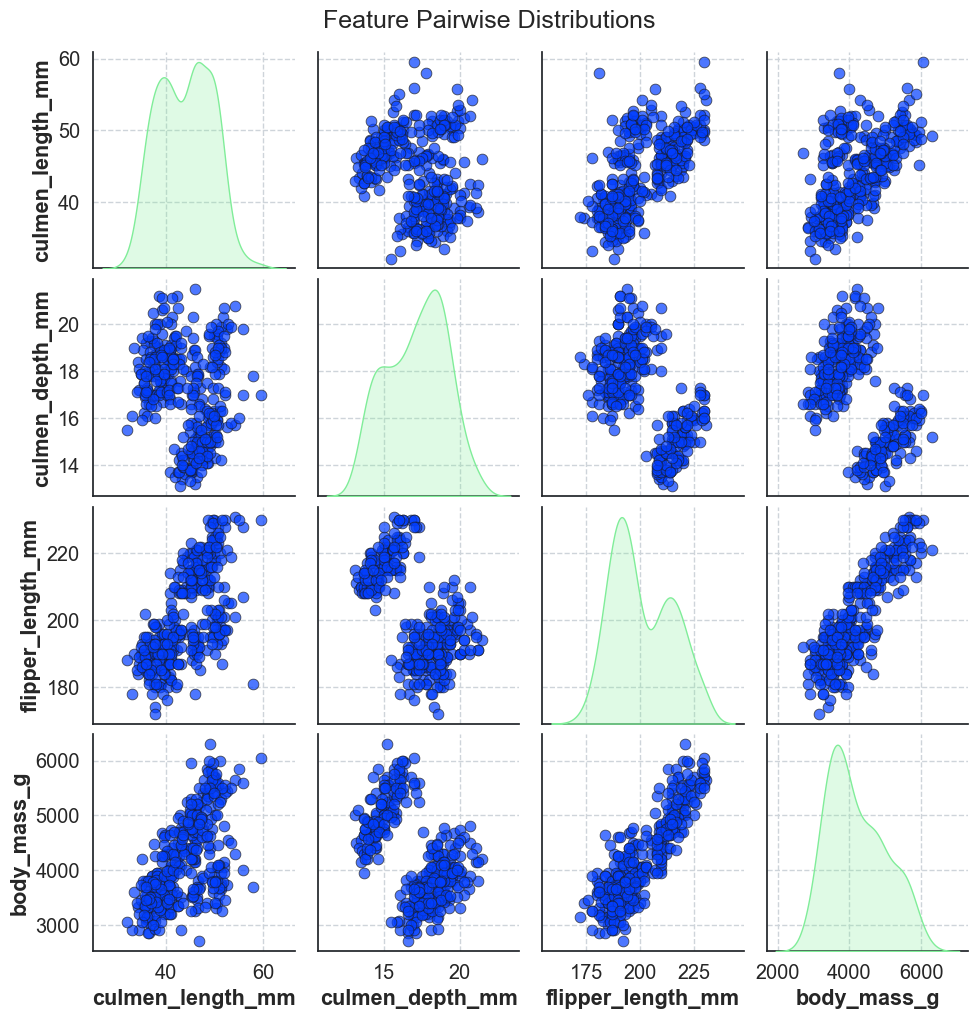

In [24]:
sns.pairplot(
    df[["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm", "body_mass_g"]],
    corner=False,
    diag_kind="kde",
    plot_kws={"alpha": 0.7, "s": 60, "edgecolor": "k"},
    diag_kws={"fill": True, "color": "#80ed99"}
)
plt.suptitle("Feature Pairwise Distributions", y=1.02, fontsize=18)
plt.show()



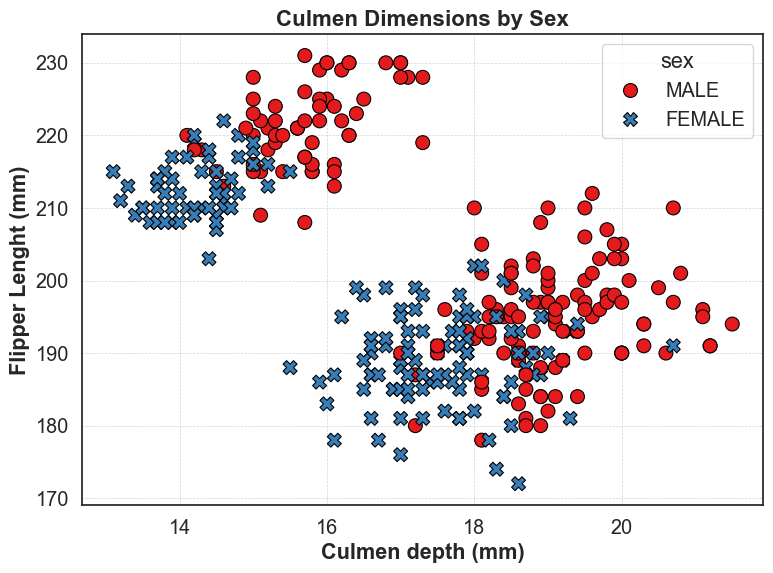

In [25]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, 
    x='culmen_depth_mm', 
    y='flipper_length_mm', 
    hue='sex', 
    style='sex',
    palette='Set1',
    s=100, 
    edgecolor='black'
)
plt.title("Culmen Dimensions by Sex", fontsize=16)
plt.xlabel("Culmen depth (mm)")
plt.ylabel("Flipper Lenght (mm)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


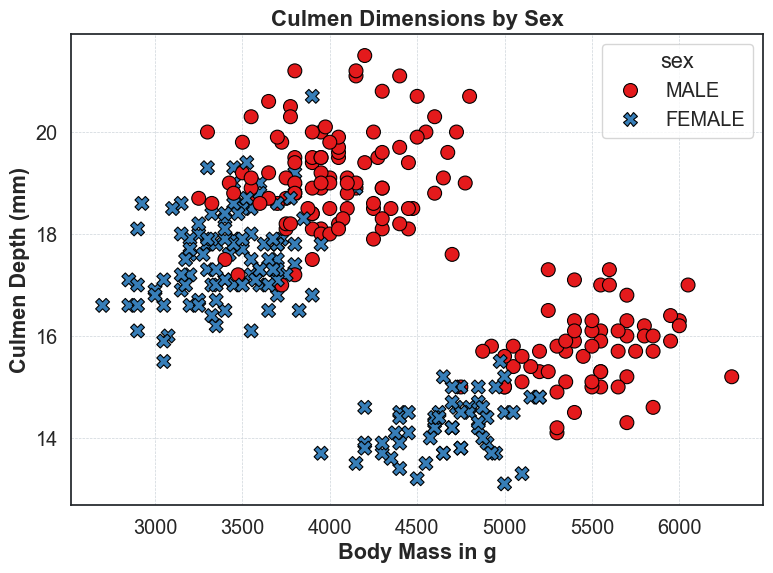

In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, 
    x='body_mass_g', 
    y='culmen_depth_mm', 
    hue='sex', 
    style='sex',
    palette='Set1',
    s=100, 
    edgecolor='black'
)
plt.title("Culmen Dimensions by Sex", fontsize=16)
plt.xlabel("Body Mass in g")
plt.ylabel("Culmen Depth (mm)")
plt.grid(True, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


---
# K-Means Clustering on the Penguins Dataset

---

##  Introduction

The penguins dataset contains measurements of penguin species with features like culmen length, culmen depth, flipper length, and body mass.  
We will apply **K-Means clustering**, an unsupervised learning technique, to group penguins based on these features.

---




### Objective Function of K-Means

The goal of K-Means is to minimize the **intra-cluster variance(WCSS-Within Clusters Sum of Sqaures)**, formally defined by the objective function:

$$
\Large J = \sum_{j=1}^k \sum_{\mathbf{x}_i \in C_j} \|\mathbf{x}_i - \boldsymbol{\mu}_j\|^2
$$

Where:

- $k$ = Number of clusters
- $C_j$ = Set of points in cluster $j$
- $\mathbf{x}_i$ = Data point $i$
- $\boldsymbol{\mu}_j$ = Centroid of cluster $j$
- $J$ = Total within-cluster sum of squared distances

This function calculates the total squared distance between each point and its cluster centroid. **K-Means tries to minimize this.**


### Steps of the K-Means Algorithm

1. **Initialize** $k$ centroids randomly
2. **Assign** each data point to the nearest centroid
3. **Update** each centroid to the mean of its assigned points
4. **Repeat** steps 2–3 until convergence (no changes in assignments or centroids)

K-Means is an **unsupervised** algorithm — it does not rely on labeled data.


###  K-Means Step-by-Step Visualization

![K-Means Animation](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)


###  Elbow Method for Choosing Number of Clusters


![Elbow Method](Elbow_Method.png)

This plot shows how inertia decreases as we increase `k`. The "elbow" point—where the curve bends—typically suggests the optimal number of clusters.

---




Elbow point is basically where your graph starts to "settle" a bit

In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

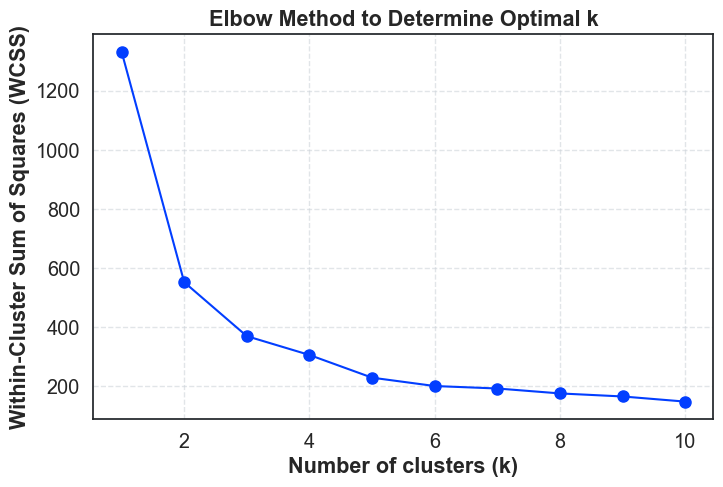

In [28]:
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate Within-Cluster Sum of Squares (WCSS) for k=1 to k=10
wcss = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=45)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8,5))
plt.plot(k_range, wcss, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()




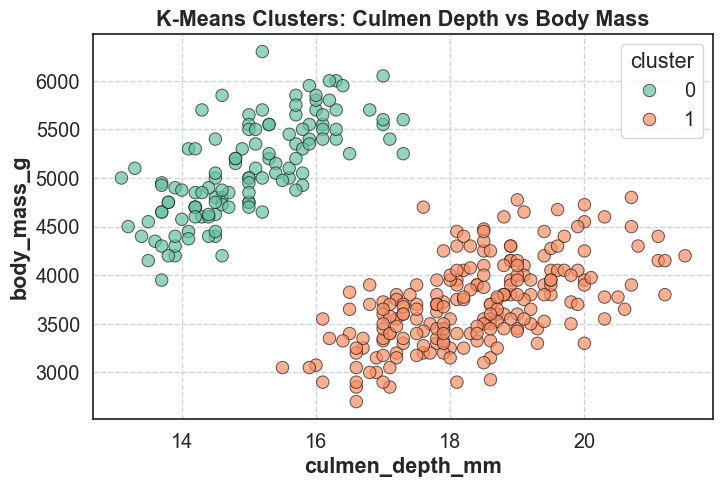

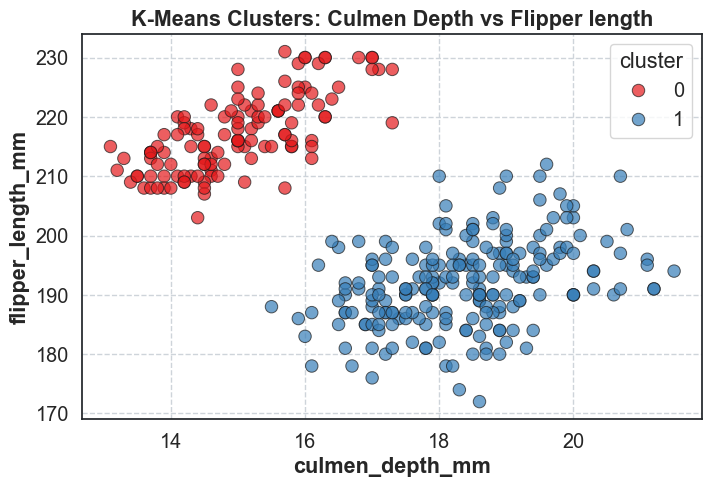

In [29]:
# Select numerical features
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
X = df[features]

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choose clusters (k=2 by visual intuition)
kmeans = KMeans(n_clusters=2, random_state=50)
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster labels to dataframe
df['cluster'] = clusters

# Visualizing cluster on features 
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='culmen_depth_mm', 
    y='body_mass_g', 
    hue='cluster', 
    palette='Set2', 
    data=df,
    alpha=0.7,
    s=80,
    edgecolor='k'
)
plt.title('K-Means Clusters: Culmen Depth vs Body Mass')
plt.show()
# Visualizing cluster on features 
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='culmen_depth_mm', 
    y='flipper_length_mm', 
    hue='cluster', 
    palette='Set1', 
    data=df,
    alpha=0.7,
    s=80,
    edgecolor='k'
)
plt.title('K-Means Clusters: Culmen Depth vs Flipper length')
plt.show()

sex      FEMALE  MALE
cluster              
0            58    62
1           107   106


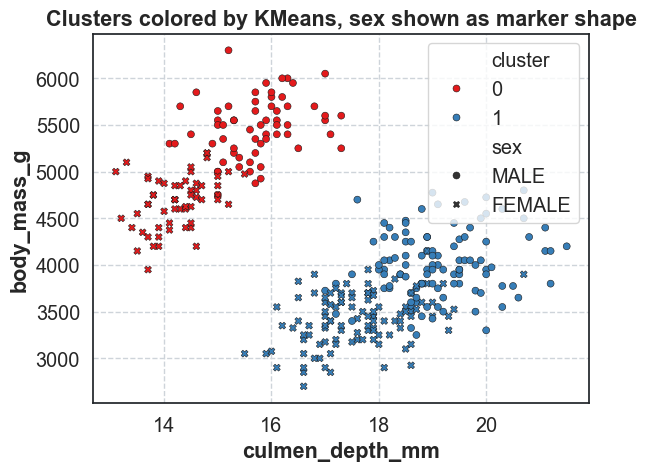

In [30]:
# Crosstab of clusters vs sex
print(pd.crosstab(df['cluster'], df['sex']))

# Visualize with scatterplot coloring by cluster, shape by sex
sns.scatterplot(
    x='culmen_depth_mm',
    y='body_mass_g',
    hue='cluster',
    style='sex',
    palette='Set1',
    data=df,
    s=25,
    edgecolor='k'
)
plt.title("Clusters colored by KMeans, sex shown as marker shape")
plt.show()


---
# Taking k as 4 now we get -
---

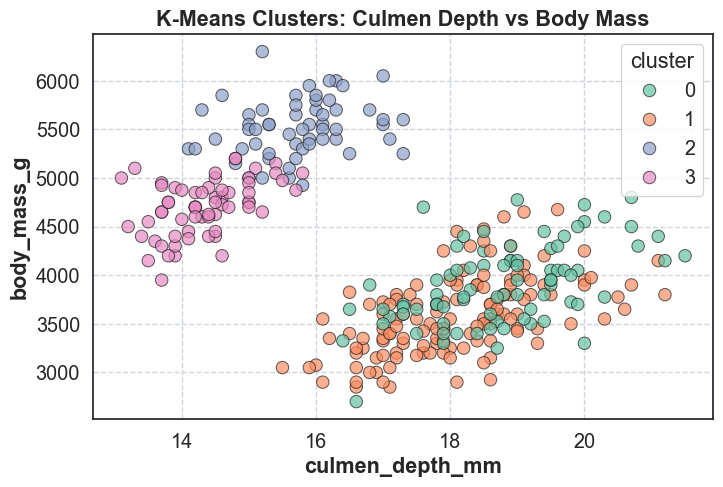

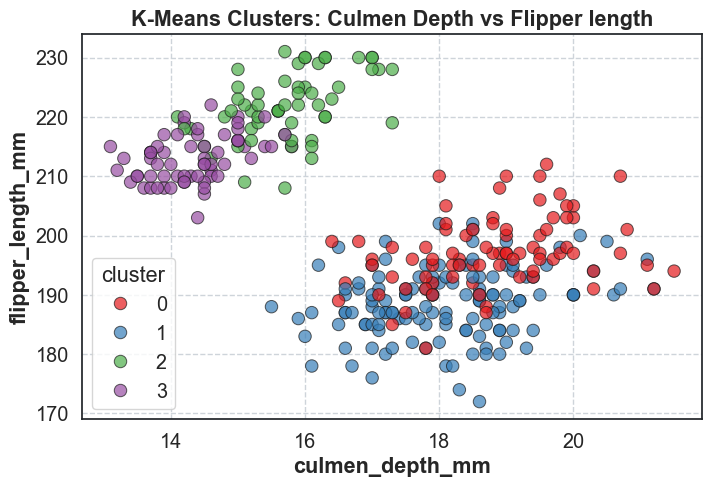

sex      FEMALE  MALE
cluster              
0            27    54
1            80    52
2             2    55
3            56     7


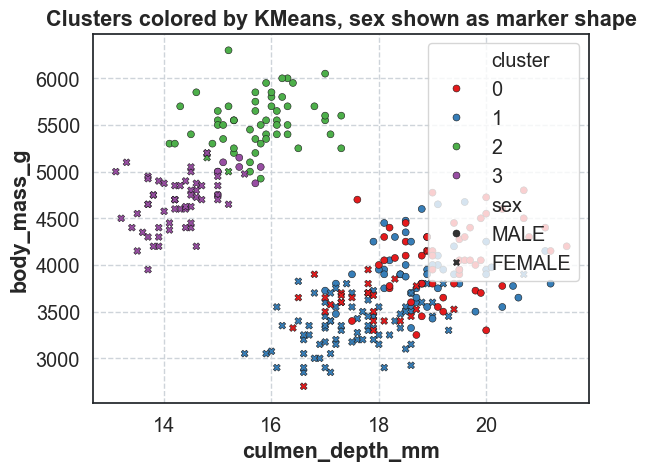

In [31]:
# Choose clusters (k=4 by elbow curve)
kmeans = KMeans(n_clusters=4, random_state=50)
clusters = kmeans.fit_predict(X_scaled)

# Adding cluster labels to dataframe
df['cluster'] = clusters

# Visualizing cluster on features 
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='culmen_depth_mm', 
    y='body_mass_g', 
    hue='cluster', 
    palette='Set2', 
    data=df,
    alpha=0.7,
    s=80,
    edgecolor='k'
)
plt.title('K-Means Clusters: Culmen Depth vs Body Mass')
plt.show()
# Visualizing cluster on features 
plt.figure(figsize=(8,5))
sns.scatterplot(
    x='culmen_depth_mm', 
    y='flipper_length_mm', 
    hue='cluster', 
    palette='Set1', 
    data=df,
    alpha=0.7,
    s=80,
    edgecolor='k'
)
plt.title('K-Means Clusters: Culmen Depth vs Flipper length')
plt.show()
# Crosstab of clusters vs sex
print(pd.crosstab(df['cluster'], df['sex']))

# Visualize with scatterplot coloring by cluster, shape by sex
sns.scatterplot(
    x='culmen_depth_mm',
    y='body_mass_g',
    hue='cluster',
    style='sex',
    palette='Set1',
    data=df,
    s=25,
    edgecolor='k'
)
plt.title("Clusters colored by KMeans, sex shown as marker shape")
plt.show()


# Now clustering considering all the features given, we will use PCA for this

In [33]:
print("Columns in the DataFrame:", df.columns.tolist())
df_clustering = df.copy()
numerical_features = df_clustering.select_dtypes(include=['float64', 'int64']).columns
X = df_clustering[numerical_features]
X = X.dropna()
# Create a cleaned DataFrame that matches the rows used for clustering
df_cleaned = df_clustering.loc[X.index].copy()
# Standardize features using StandardScaler
X_scaled = scaler.fit_transform(X)

Columns in the DataFrame: ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex', 'cluster']


--- 
# Apply K-Means with K=4
---

In [36]:
optimal_k = 4

kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=45, n_init=10)
clusters = kmeans_optimal.fit_predict(X_scaled)

df_cleaned['cluster'] = clusters

---  
# Visual Representation of Final Clusters 
---
# Since the dataset has more than 2 features, we use PCA to reduce dimensions to 2
# for a 2D scatter plot visualization.

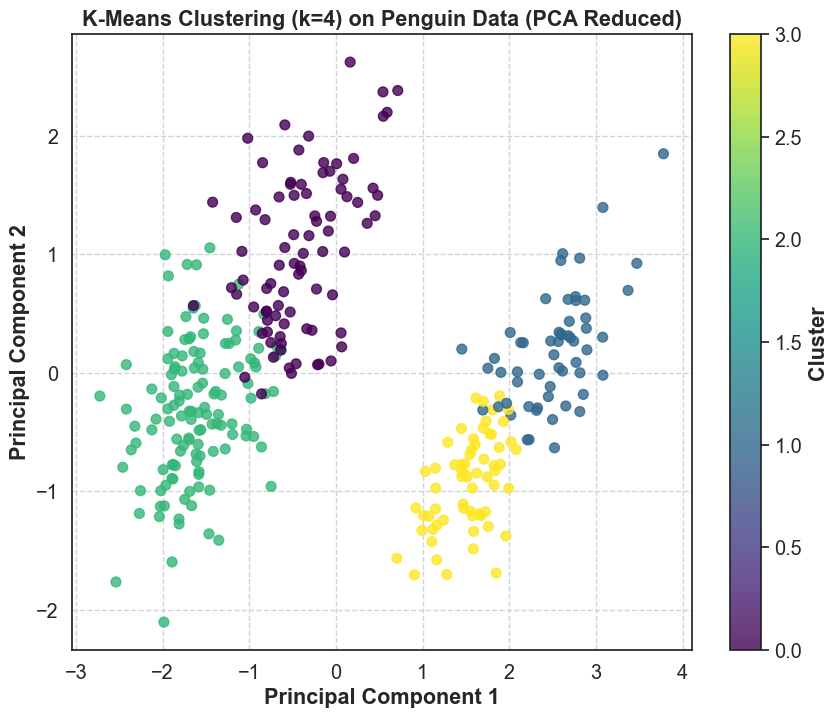

In [37]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for plotting with PCA components and cluster labels
df_pca = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['cluster'] = clusters # Add cluster labels to the PCA DataFrame

# Plot the clusters
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df_pca['Principal Component 1'], df_pca['Principal Component 2'],
                      c=df_pca['cluster'], cmap='viridis', s=50, alpha=0.8)
plt.title(f'K-Means Clustering (k={optimal_k}) on Penguin Data (PCA Reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster') # Add a color bar to identify clusters
plt.grid(True)
plt.show() # Display the final clusters plot

--- 
# Display Numerical Results (as before) 
---

In [39]:
print("\nDataFrame with Cluster Assignments (first 5 rows):")
print(df_cleaned.head())

print(f"\nOptimal K-Means Clustering with k = {optimal_k}")
print("Cluster Centers (scaled features):")
print(pd.DataFrame(kmeans_optimal.cluster_centers_, columns=numerical_features))

print("\nCluster Sizes:")
print(df_cleaned['cluster'].value_counts().sort_index())



DataFrame with Cluster Assignments (first 5 rows):
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g     sex  \
0              39.1             18.7              181.0       3750.0    MALE   
1              39.5             17.4              186.0       3800.0  FEMALE   
2              40.3             18.0              195.0       3250.0  FEMALE   
4              36.7             19.3              193.0       3450.0  FEMALE   
5              39.3             20.6              190.0       3650.0    MALE   

   cluster  
0        2  
1        2  
2        2  
4        2  
5        2  

Optimal K-Means Clustering with k = 4
Cluster Centers (scaled features):
   culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
0          0.669563         0.817786          -0.292869    -0.385513
1          1.061502        -0.720887           1.489763     1.629356
2         -1.051678         0.485578          -0.889320    -0.771631
3          0.272957        -1.437702   

---
# Takeaways 
---

# Interpreting K-Means Clusters (k=4) on Penguin Data

The K-Means algorithm, when run with **4 clusters**, has segmented the penguin dataset into four distinct groups based on their morphological measurements. By examining the **scaled cluster centers**, we can infer the unique characteristics of each group.

---

##  Cluster 0 (Size: 85)

| Feature             | Scaled Value | Interpretation             |
|---------------------|--------------|-----------------------------|
| culmen_length_mm    | 0.67         | Moderately above average    |
| culmen_depth_mm     | 0.82         | Moderately above average    |
| flipper_length_mm   | -0.29        | Slightly below average      |
| body_mass_g         | -0.39        | Slightly below average      |

**Interpretation:**  
Penguins in this cluster have **moderately longer and deeper culmens**, but slightly **shorter flippers** and **lower body mass** than average.

---

##  Cluster 1 (Size: 57)

| Feature             | Scaled Value | Interpretation              |
|---------------------|--------------|------------------------------|
| culmen_length_mm    | 1.06         | Significantly above average |
| culmen_depth_mm     | -0.72        | Below average                |
| flipper_length_mm   | 1.49         | Significantly above average |
| body_mass_g         | 1.63         | Significantly above average |

**Interpretation:**  
These are likely the **largest penguins** in the dataset — characterized by **very long culmens and flippers**, **high body mass**, and a **shallower culmen depth**.

---

##  Cluster 2 (Size: 128)

| Feature             | Scaled Value | Interpretation              |
|---------------------|--------------|------------------------------|
| culmen_length_mm    | -1.05        | Significantly below average |
| culmen_depth_mm     | 0.49         | Moderately above average    |
| flipper_length_mm   | -0.89        | Significantly below average |
| body_mass_g         | -0.77        | Significantly below average |

**Interpretation:**  
This cluster likely represents the **smallest penguins**. They have **short culmens and flippers**, **low body mass**, and a **moderately deep culmen** — possibly corresponding to **Adélie penguins**.
<img src="Adele.jpg" width="300"/>

---

##  Cluster 3 (Size: 63)

| Feature             | Scaled Value | Interpretation                  |
|---------------------|--------------|----------------------------------|
| culmen_length_mm    | 0.27         | Slightly above average          |
| culmen_depth_mm     | -1.44        | Very significantly below average|
| flipper_length_mm   | 0.85         | Significantly above average     |
| body_mass_g         | 0.61         | Above average                   |

**Interpretation:**  
This group stands out with an **exceptionally shallow culmen depth**, **slightly longer culmens**, **significantly longer flippers**, and **above-average body mass** — possibly representing **Chinstrap penguins**.
<img src="chinstrap.png" width="300"/>

---
